# Pointillism effect in Python

In [19]:
import enum


class ColorMode(enum.Enum):
    MODE_3_BITS = 0
    MODE_6_BITS = 1
    MODE_8_BITS = 2


def cast_colors_rate(color: tuple[int, int, int], mode: ColorMode = ColorMode.MODE_8_BITS):
    r, g, b = color
    if mode == ColorMode.MODE_8_BITS:
        return (r >> 5) << 5, (g >> 5) << 5, (b >> 6) << 6
    elif mode == ColorMode.MODE_6_BITS:
        return (r >> 6) << 6, (g >> 6) << 6, (b >> 6) << 6
    elif mode == ColorMode.MODE_3_BITS:
        return (r >> 7) * 255, (g >> 7) * 255, (b >> 7) * 255

    raise ValueError("Mode not supported")


In [20]:
import random

import numpy as np
from PIL import Image, ImageDraw


def pointillism_effect(img: Image, n_points: int, min_alpha: int = 250, point_size_range: tuple[int, int] = (1, 5),
                       sub_matrix_size: int = 5) -> Image:
    m_img_source = np.array(img)
    img_canvas = Image.new("RGBA", size=img_source.size, color="white")
    canvas = ImageDraw.Draw(img_canvas)

    for _ in range(n_points):
        r = random.randint(*point_size_range)
        x, y = random.randint(0, img_canvas.width - 1), random.randint(0, img_canvas.height - 1)

        sub_m = m_img_source[y:y + sub_matrix_size, x: x + sub_matrix_size]
        media_color = np.median(sub_m, axis=0).astype(int)[0]

        alpha = random.randint(min_alpha, 255)
        fill_color = (*media_color, alpha)
        xyr = x - r, y - r, x + r, y + r

        canvas.ellipse(xyr, fill=fill_color)

    return img_canvas


def pointillism_effect_solid(img: Image, n_points: int, point_size_range: tuple[int, int] = (1, 5),
                             sub_matrix_size: int = 5, mode: ColorMode = ColorMode.MODE_8_BITS) -> Image:
    m_img_source = np.array(img)
    img_canvas = Image.new("RGB", size=img_source.size, color="white")
    canvas = ImageDraw.Draw(img_canvas)

    for _ in range(n_points):
        r = random.randint(*point_size_range)
        x, y = random.randint(0, img_canvas.width - 1), random.randint(0, img_canvas.height - 1)

        sub_m = m_img_source[y:y + sub_matrix_size, x: x + sub_matrix_size]
        media_color = np.median(sub_m, axis=0).astype(int)[0]

        fill_color = cast_colors_rate(media_color, mode)
        xyr = x - r, y - r, x + r, y + r

        canvas.ellipse(xyr, fill=(*fill_color,))

    return img_canvas


## Load image

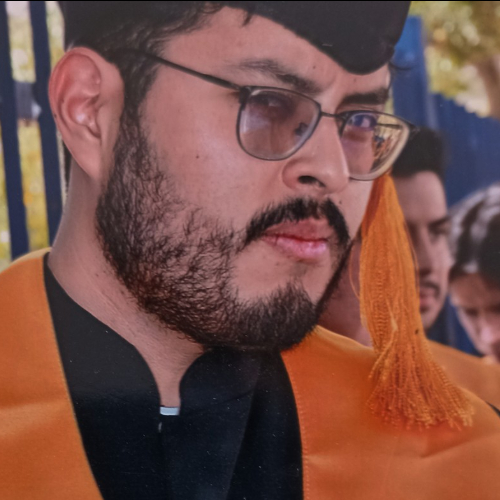

In [21]:
FILENAME = "resources/people/el_inge.jpg"

img_source = Image.open(FILENAME).convert("RGB")
img_source

## Filter application

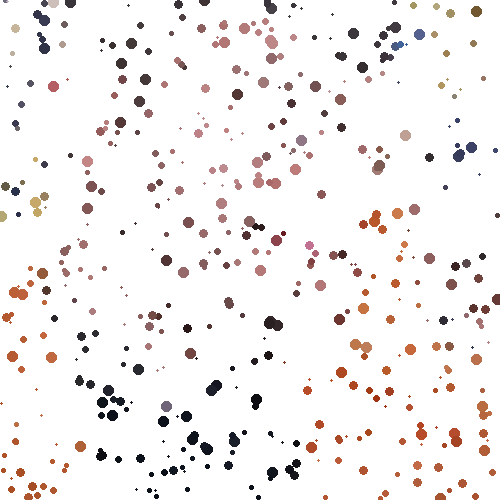

In [22]:
pointillism_effect(img_source, 500, sub_matrix_size=3)

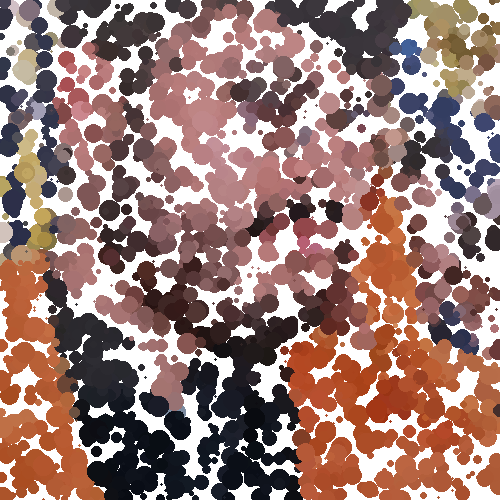

In [23]:
pointillism_effect(img_source, 2500, sub_matrix_size=5, point_size_range=(1, 10))

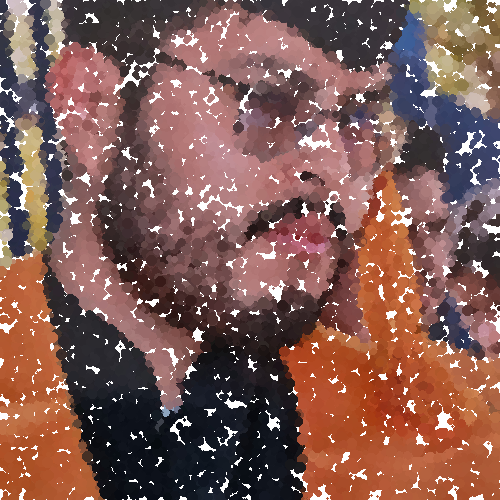

In [24]:
pointillism_effect(img_source, 15000, sub_matrix_size=5)

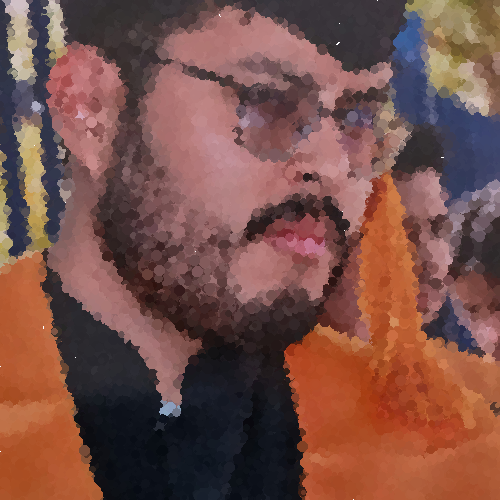

In [25]:
pointillism_effect(img_source, 50000, sub_matrix_size=5)

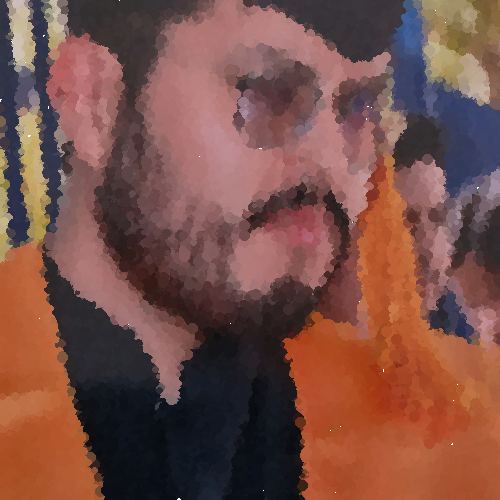

In [26]:
pointillism_effect(img_source, 50000, sub_matrix_size=25)

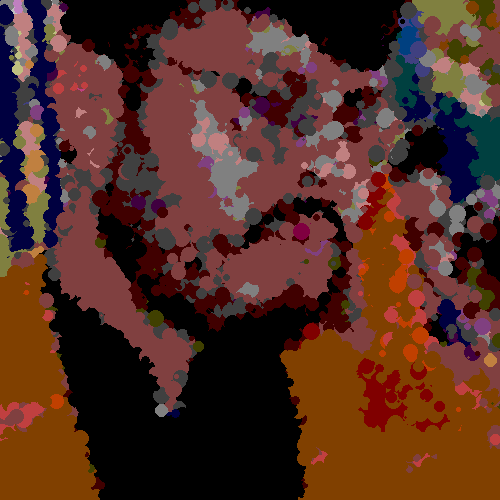

In [27]:
pointillism_effect_solid(img_source, 35000, sub_matrix_size=5, mode=ColorMode.MODE_6_BITS, point_size_range=(1, 8))